**Autor**: 
Matheus Jericó Palhares <br>
**LinkedIn**:
https://www.linkedin.com/in/matheusjerico

## CONTEXTO

O presente problema se refere aos dados de vinhos portugueses
"Vinho Verde", que possuem variantes de vinho branco e tinto.
Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis (por
exemplo, não há dados sobre tipo de uva, marca do vinho, preço
de venda, etc).

## OBJETIVO

Criar um modelo para estimar a qualidade do vinho.

**Informação sobre os atributos**

Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool

Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

## EXECUÇÃO

**1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar possíveis variáveis que impactam na qualidade do vinho.**

Após realizar uma análise exploratória nos dados, percebeu-se inconsistência nas seguintes features:
- Tipo de Vinho (type): Inicialmente a variável apresentava o nome do tipo do vinho em formato string, 'red' ou 'white'. Apliquei a técnica de LabelEncoder para transaformar a variável string em variável numérica binária 
    - {'Red': 0, 'White': 1};
- 'Álcool (alcohol)': Inicialmente a variável álcool estava em formato string e apresentou valores inconsistentes, como dizima periódia. Fazendo com que não fosse possível aplicar uma simples transformação de string -> float. Foi necessário utilizar regex para extração dos 3 primeiros números presentes na variável, e após esse passo, transformá-lo em uma variável numérica. Com a variável álcool, foi necessário ter o entendimento dos valores possíveis referentes ao percentual de álcool presente em vinhos.
- 'Densidade (density)': A variável densidade apresentou valores inconsistentes, com valores na casa das dezenas e na casa das centenas. Foi necessário aplicar técnicas para manipulação dos dados e transformação para valores na casa da unidade.

Após correção dos dados, foi realizada uma análise exploratória para visualização da distribuição e relação entre as variáveis. Foi aplicado o método de correlação de pearson para analisar as features com maior correlação com a variável qualidade. As variáveis que apresentaram maior correlação com a variável target foram:
1. Alcohol                  0.44
2. Density                 -0.31
3. Volatile Acidity        -0.27
4. Chlorides               -0.2
5. Type                    -0.12
6. Citric Acid              0.086

Entretando, correlação não implica causalidade. Dessa forma, foi aplicado o algoritmo Random Forest (árvore de decisão) para realizar o cálculo das features mais relevantes. À vista disso, as principais variáveis que impactam na qualidade do vinho são:

1. Alcohol                 0.121845
2. Density                 0.103366
3. Volatile Acidity        0.099089
4. Total Sulfur Dioxide    0.090200
5. Free Sulfur Dioxide     0.086572
6. Chlorides               0.085483
---
**2. Para a realização deste teste você pode utilizar o software de sua preferência (Python ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas para os 5 pontos abaixo:**
  - **a) Como foi a definição da sua estratégia de modelagem?**
  
      A definição da minha estratégia começou pelo entendimento do problema proposto, seguido pelo entendimento dos dados. Após ter certo domínio sobre qual o objetivo apresentado e sobre os dados, apliquei técnicas para alterar a distribuição dos dados, pois os algoritmos utilizados performam melhor quando a distribuição dos dados é normal. Logo após, criei 4 novas variáveis para obter um melhor resultado. Posteriormente, treinei algoritmos de classificação multi-classe, utilizando métodos de tunning e validação cruzada e selecionei o algoritmo que obteve as melhores métricas.
      - Dessa forma, segui os seguintes passos: 
          1. Primeiramente, realizei um entendimento do problema de negócio, realizei pesquisas no google sobre vinhos e como especialistas definem a qualidade de um vinho. Como a variável qualidade (target) é uma variável qualitativa ordinal, pois existe uma ordenação entre os valores (scores), defini como um problema de classificação multi-classe;
          2. Explorei a qualidade dos dados, as medidas de tendência central e dispersão dos dados. Após verificar inconsistência nos dados, apliquei métodos para correção;
          3. Realizei uma análise exploratória dos dados para um maior entendimento, visualizando a distribuição dos dados e análise bivariada;
          4. Verifiquei a correlação entre os dados e as features mais relevantes utilizando o algoritmo de árvore de decisão, logo após criei novas features para aumentar o desempenho do algoritmo;
          5. Selecionei modelos de classificação, apliquei tunning e selecionei o modelo que obteve as melhores métricas.
---
  - **b) Como foi definida a função de custo utilizada?**
  
      Primeiramente fiz a seleção de 5 modelos de classificação, realizei otimização de parâmetros com a função GridSearchCV, e validei qual modelo obteve os melhores valores para as métricas selecionadas (acurária, revocação e F1 score). Após definição do algoritmo, selecionei a função de custo Gini, que é a função de custo padrão do algoritmo Random Forest.
---
  - **c) Qual foi o critério utilizado na seleção do modelo final?**
  
      Selecionei 4 modelos de classificação que são utilizados para problemas similares. Após seleção, realizei tunning dos hiperparâmetros, treinei os modelos e validei utilizando os dados de Teste com as métricas acurácia, revocação e F1 Score. Selecionei o modelo que obteve a melhor combinação de métricas, utilziando o método ***classification_report***.
---    
  - **d) Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método?***
  
    O critério utilizado para validação do modelo, foi separar os dados apresentados em dados de treino (features e target) e dados de teste (features e target), treinar o modelo com os dados de treino, e validar o modelo com os dados de teste, realizando predição da variável target ***qualidade***, e validando as predições realizadas comparando o resultado predito com o resultado verdadeiro nos dados de teste. Utilizando as métricas de acurácia, revocação e F1 score. Escolhi este método pois é um problema de classificação multi-classe e é eficiente para validar modelos de machine learning com uma quantidade de dados relativamente pequena.
---
   - **e) Quais evidências você possui de que seu modelo é suficientemente bom?**
   
     Quando o objetivo é classificar o Score do vinho (7 valores possíveis), utilizando as métricas de acurácia, revocação e F1 score, meu modelo obteve 70%. Tendo em vista que os dados estão desbalanceados (a maior parte dos vinhos apresentados tem o valor de qualidade entre 5 e 6) e apenas 6497 dados foram apresentados, o modelo teve um bom resultado.
     Quando eu alterei o objetivo de classificação, classificando o vinho nas classes de **Ruim (qualidade: 3 e 4)**, **Regular (qualidade: 5 e 6)** e **Bom (qualidade: 7, 8 e 9)***, utilizando as métricas de acurácia, revocação e F1 score, meu modelo obteve 85%. O resultado foi muito superior do que classificar o Score do vinho.

### 1. IMPORTANDO BIBLIOTECAS

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 50000)

### 2. IMPORTANDO DADOS

In [3]:
dataset = pd.read_csv('dados/winequality.csv', sep=';')

### 3. EXPLORANDO DADOS

- Visualizando algumas cabeçalho do dataset:

In [4]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- Informações sobre o tipo das variáveis, quantidade de registros e se existe algum valor nulo:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


- Visualizando em formato tabular as medidas de tendência central e dispersão:

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


- Validando quantidade de registros nulos presentes do dataset:

In [7]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Verificando a existência de dados duplicados:

In [8]:
sum(dataset.duplicated())

1177

- Análise:
  - Nota-se que não exite valores NaN (nulos);
  - As features Type e Alcohol estão como string, alterar para valores numéricos;
  - As features estão com espaço no nome, alterar para "_" ;
  - Dos 6497 registros presentes no dataset, 1177 são registros duplicados;

- Transformando as features Type e Alcohol em valores numéricos:

1. Type:
  - Aplicando LabelEncoder() para transformação do valor em string para valores binário:

In [9]:
le = LabelEncoder()
le.fit(dataset['type'])
print("Classes: {}".format(le.classes_))
print("(Antes do LE) Registros sobre o tipo do vinho: {}".format(list(dataset.type[:5])))
dataset['type'] = le.transform(dataset['type'])
print("(Depois do LE) Registros sobre o tipo do vinho: {}".format(list(dataset.type[:5])))
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de classes: {}".format(le_mapping))

Classes: ['Red' 'White']
(Antes do LE) Registros sobre o tipo do vinho: ['White', 'White', 'White', 'White', 'White']
(Depois do LE) Registros sobre o tipo do vinho: [1, 1, 1, 1, 1]
Mapeamento de classes: {'Red': 0, 'White': 1}


2. Alcohol **(Valores Inconsistente)**:
    - Feature com valor numérico, entretando, em formato string.
    - A coluna alcohol veio com formato zuado:
      - Alguns valores estão com dizima periódica, e como está em formato string, não foi possível fazer transformação rápida para valor numérico.
    - Resolução do problema:
        - Aplicar regex para pegar os 3 primeiros digitos antes do '.';
        - Após pegar os 3 primeiros digitos, transformar em valores numéricos;
        - Se o valor numérico começar com '1', dividir por 10;
        - Se o valor numérico começar com {8,9}, dividir por 100.
        - Regex = (^\w{3})

In [10]:
df_value_counts = pd.DataFrame(dataset['alcohol'].value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts']
df_value_counts.tail()

,unique_values,counts
107,123.333.333.333.333,1
108,12.05,1
109,113.666.666.666.667,1
110,13.05,1
111,956.666.666.666.667,1


- Aplicando regex e criando uma nova coluna 'new_alcohol' com os valores corrigidos:

In [11]:
dataset['new_alcohol'] = np.where(dataset['alcohol'].str.match(r'^\w{3}'), 
                                  dataset['alcohol'].map(lambda x: re.findall(r'^\w{3}', x)[0] if re.findall(r'^\w{3}', x) else x),
                                  dataset['alcohol'])

- Transformando a coluna 'new_alcohol' em float:

In [12]:
dataset['new_alcohol'] = dataset['new_alcohol'].astype('float')

- Com a nova coluna com valor numérico, corrigindo-o para o valor correto:
    - Valores entre 100 e 200, serão divididos por 10, pois deve oscilar entre 10 e 20;
    - Valores na casa dos 900, serão divivido por 100, pois deve oscilar entre 9.0 até 9.9;

In [13]:
dataset['new_alcohol'] = np.where((dataset['new_alcohol'] >= 100) & (dataset['new_alcohol'] < 200), dataset['new_alcohol']/10, dataset['new_alcohol'])
dataset['new_alcohol'] = np.where((dataset['new_alcohol'] > 800), dataset['new_alcohol']/100, dataset['new_alcohol'])


In [14]:
df_value_counts_new_alcohol = pd.DataFrame(dataset['new_alcohol'].value_counts())
df_value_counts_new_alcohol = df_value_counts_new_alcohol.reset_index()
df_value_counts_new_alcohol.columns = ['unique_values', 'counts']
df_value_counts_new_alcohol.tail(10)

,unique_values,counts
81,12.25,1
82,14.90,1
83,10.65,1
84,14.05,1
85,9.63,1
86,11.85,1
87,14.20,1
88,13.05,1
89,9.05,1
90,11.55,1


- Transformando a coluna 'new_alcohol' na coluna 'alcohol' e dropando a coluna 'new_alcohol':

In [15]:
dataset['alcohol'] = dataset['new_alcohol']
dataset.drop(columns='new_alcohol', inplace=True)

- Validando formato dos dados:

In [16]:
dataset.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,10.491547,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,1.192534,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


- Após visualizar a descrição do dataset, nota-se que a coluna 'density' possue **valores inconsistente**.
    - Apresenta valores na casa das dezenas e centenas.
    - A correção será feita utilizando a mesma técnica aplicada na coluna alcohol.


In [17]:
dataset['density'] = np.where((dataset['density'] >= 10.0) & (dataset['density'] < 20), dataset['density']/10, dataset['density'])
dataset['density'] = np.where((dataset['density'] > 100), dataset['density']/100, dataset['density'])


In [18]:
dataset.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491547,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192534,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- **Dataset com os dados corrigidos.**
    - Apenas dados consistêntes.

- Alterando o nome das colunas, substituindo o " " por "_":


In [19]:
dataset.rename(columns = {'total sulfur dioxide': 'total_sulfur_dioxide',
                          'fixed acidity':'fixed_acidity',
                          'residual sugar':'residual_sugar', 
                          'citric acid':'citric_acid',
                          'volatile acidity':'volatile_acidity',
                          'free sulfur dioxide':'free_sulfur_dioxide'}, inplace=True)

In [20]:
print("Nome das colunas: {}".format(dataset.columns))

Nome das colunas: Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


### 4. ANÁLISE EXPLORATÓRIA

- Skewness (Assimetria):
    - Se o valor de skewness está entre -0.5 e 0.5, os dados são bastante simétricos
    - Se o valor de skewness está entre -1 e -0.5 ou entre 0.5 e 1, os dados estão moderadamente inclinados
    - Se o valor de skewness é menor que -1 ou maior que 1, os dados são altamente distorcidos
---
- Kurtosis (Curtose):
    - Se kurtosis=0, então a função de distribuição tem o mesmo achatamento da distribuição normal, chamamos essas funções de mesócurticas.
    - Se kurtosis > 0, dizemos que a função de distribuição é leptocúrtica e possui a curva da função de distribuição mais afunilada com um pico mais alto do que a distribuição normal. Neste caso dizemos que essa distribuição possui caudas pesadas.
    - Se kurtosis < 0, então a funçao de distribuição é mais achatada do que a distribuição normal. Dizemos que esta curva da função de distribuição é platicúrtica.

#### 4.1 Utilizando histograma (distribuição dos dados) e box plot (variação de dados)

In [21]:
print("Quantidade de colunas: {}".format(len(dataset.columns)))

Quantidade de colunas: 13


-  **1. Analisando a coluna Type**:

In [22]:
print(le_mapping)
qtd_branco = len(dataset[dataset['type'] == 1])
qtd_tinto = len(dataset[dataset['type'] == 0])
print("Quantidade de Vinhos Brancos: {}".format(qtd_branco))
print("Quantidade de Vinhos Tintos: {}".format(qtd_tinto))
print("A quantidade de Vinhos branco representa {}%".format((qtd_branco/(qtd_branco+qtd_tinto)*100)))

{'Red': 0, 'White': 1}
Quantidade de Vinhos Brancos: 4898
Quantidade de Vinhos Tintos: 1599
A quantidade de Vinhos branco representa 75.38864091118978%


Text(0.5, 1.05, 'Tipo de Vinho - Branco | Tinto')

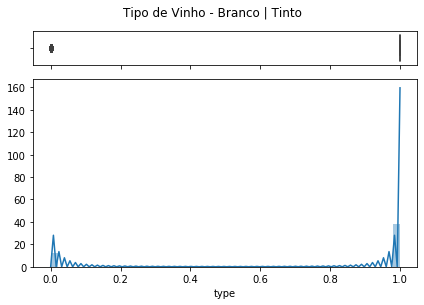

In [23]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["type"], ax=ax_box)
sns.distplot(dataset["type"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Tipo de Vinho - Branco | Tinto", y = 1.05)

---

- **2. Analisando a coluna fixed_acidity**

Text(0.5, 1.05, 'Fixed Acidity')

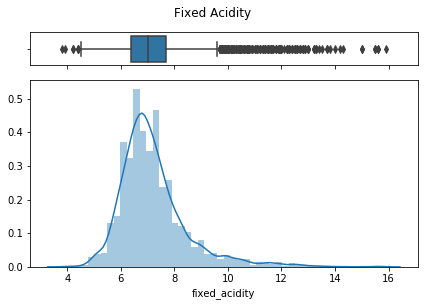

In [24]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["fixed_acidity"], ax=ax_box)
sns.distplot(dataset["fixed_acidity"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Fixed Acidity", y = 1.05)

In [25]:
print("Valor de Assimetria: {}".format(skew(dataset['fixed_acidity'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['fixed_acidity'])))

Valor de Assimetria: 1.7228917553916054
Valor de Curtose: 5.056343144995269


Os dados estão altamente distorcidos e possuem uma distribuição com um pico mais alto do que a distribuição normal.

---

- **3. Analisando a coluna Volatile Acidity**

Text(0.5, 1.05, 'Volatile Acidity')

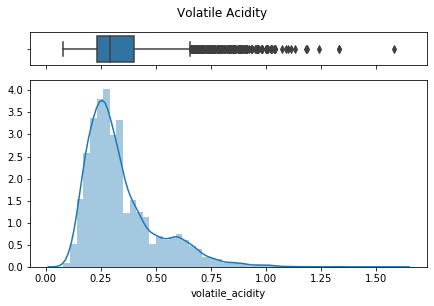

In [26]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["volatile_acidity"], ax=ax_box)
sns.distplot(dataset["volatile_acidity"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Volatile Acidity", y = 1.05)

In [27]:
print("Valor de Assimetria: {}".format(skew(dataset['volatile_acidity'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['volatile_acidity'])))

Valor de Assimetria: 1.4947513386353362
Valor de Curtose: 2.8222751577349383


Os dados estão altamente distorcidos e possuem uma distribuição com um pico mais alto do que a distribuição normal.

---

- **4. Analisando a coluna Citric Acid**

Text(0.5, 1.05, 'Citric Acid')

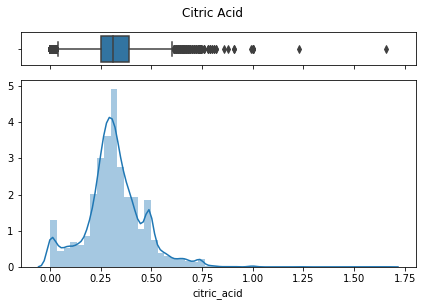

In [28]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["citric_acid"], ax=ax_box)
sns.distplot(dataset["citric_acid"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Citric Acid", y = 1.05)

In [29]:
print("Valor de Assimetria: {}".format(skew(dataset['citric_acid'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['citric_acid'])))

Valor de Assimetria: 0.47162175431208403
Valor de Curtose: 2.394471370853947


Os dados são simétricos e possuem uma distribuição com um pico mais alto do que a distribuição normal. Possue uma grande quantidade de outlier.

---

- **5. Analisando a coluna Residual Sugar**

Text(0.5, 1.05, 'Residual Sugar')

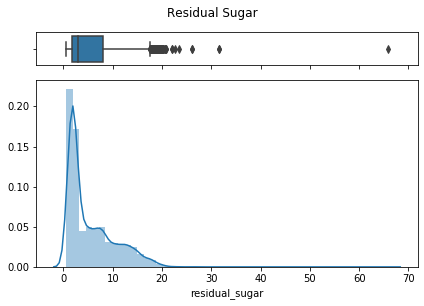

In [30]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["residual_sugar"], ax=ax_box)
sns.distplot(dataset["residual_sugar"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Residual Sugar", y = 1.05)

In [31]:
print("Valor de Assimetria: {}".format(skew(dataset['residual_sugar'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['residual_sugar'])))

Valor de Assimetria: 1.43507284144184
Valor de Curtose: 4.3549944750049665


Os dados estão altamente distorcidos e possuem uma distribuição com um pico mais alto do que a distribuição normal. Além disso, possue uma grande quantidade de outlier, é interessante analisar se os outliers tem alguma relação com a qualidade do vinho.

---

- **6. Analisando a coluna chlorides**

Text(0.5, 1.05, 'Chlorides')

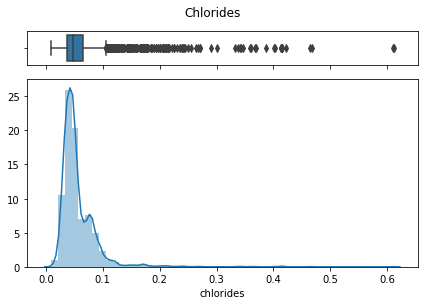

In [32]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["chlorides"], ax=ax_box)
sns.distplot(dataset["chlorides"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Chlorides", y = 1.05)

In [33]:
print("Valor de Assimetria: {}".format(skew(dataset['chlorides'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['chlorides'])))

Valor de Assimetria: 5.398580962521254
Valor de Curtose: 50.85796611348581


Os dados estão altamente distorcidos e possuem uma distribuição com um pico muito mais alto do que a distribuição normal. Da mesma forma que a feature residual_sugar, a feature chlorides possue uma grande quantidade de outlier.

---

- **7. Analisando a coluna Free Sulfur Dioxide**

Text(0.5, 1.05, 'Free Sulfur Dioxide')

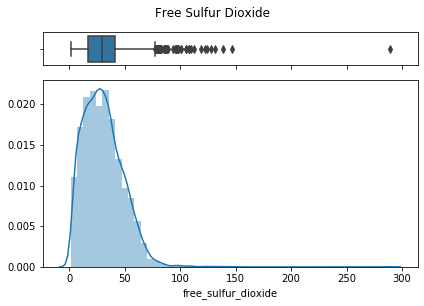

In [34]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["free_sulfur_dioxide"], ax=ax_box)
sns.distplot(dataset["free_sulfur_dioxide"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Free Sulfur Dioxide", y = 1.05)

In [35]:
print("Valor de Assimetria: {}".format(skew(dataset['free_sulfur_dioxide'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['free_sulfur_dioxide'])))

Valor de Assimetria: 1.219784372282318
Valor de Curtose: 7.899231487557648


Os dados estão altamente distorcidos e possuem uma distribuição com um pico mais alto do que a distribuição normal. Possue uma grande quantidade de outlier.

---

- **8. Analisando a coluna Total Sulfur Dioxide**

Text(0.5, 1.05, 'Total Sulfur Dioxide')

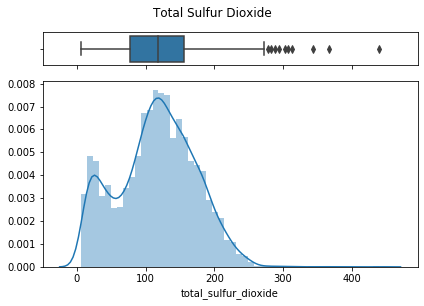

In [36]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["total_sulfur_dioxide"], ax=ax_box)
sns.distplot(dataset["total_sulfur_dioxide"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Total Sulfur Dioxide", y = 1.05)

In [37]:
print("Valor de Assimetria: {}".format(skew(dataset['total_sulfur_dioxide'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['total_sulfur_dioxide'])))

Valor de Assimetria: -0.001177206365785478
Valor de Curtose: -0.37230105038717065


Os dados são simétricos e possuem uma distribuição um pouquinho mais achatada do que a distribuição normal.

---

- **9. Analisando a coluna density**

Text(0.5, 1.05, 'Density')

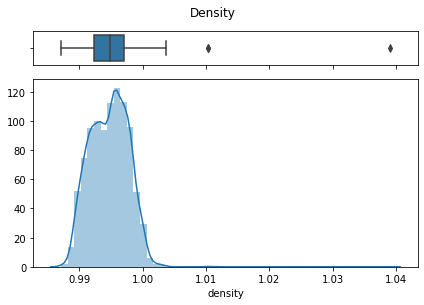

In [38]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["density"], ax=ax_box)
sns.distplot(dataset["density"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Density", y = 1.05)

In [39]:
print("Valor de Assimetria: {}".format(skew(dataset['density'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['density'])))

Valor de Assimetria: 0.5034854532378826
Valor de Curtose: 6.600060788804228


Os dados são quase simétricos e possuem uma distribuição com um pico mais alto do que a distribuição normal.

---

- **10. Analisando a coluna pH**

Text(0.5, 1.05, 'pH')

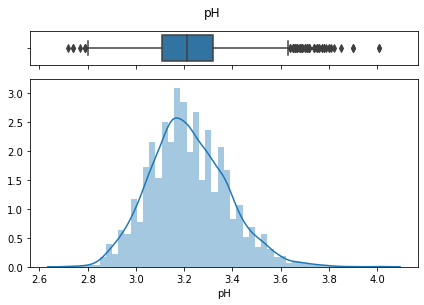

In [40]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["pH"], ax=ax_box)
sns.distplot(dataset["pH"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("pH", y = 1.05)

In [41]:
print("Valor de Assimetria: {}".format(skew(dataset['pH'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['pH'])))

Valor de Assimetria: 0.3867494806198059
Valor de Curtose: 0.3664510234109213


Os dados são simétricos e possuem uma distribuição um pouquinho mais achatada do que a distribuição normal.

---

- **11. Analisando a coluna sulphates**

Text(0.5, 1.05, 'Sulphates')

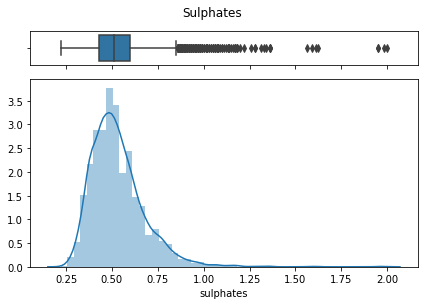

In [42]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["sulphates"], ax=ax_box)
sns.distplot(dataset["sulphates"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Sulphates", y = 1.05)

In [43]:
print("Valor de Assimetria: {}".format(skew(dataset['sulphates'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['sulphates'])))

Valor de Assimetria: 1.796855031034402
Valor de Curtose: 8.64611713135232


Os dados estão altamente distorcidos e possuem uma distribuição com um pico mais alto do que a distribuição normal.


---

- **11. Analisando a coluna alcohol**

Text(0.5, 1.05, 'Alcohol')

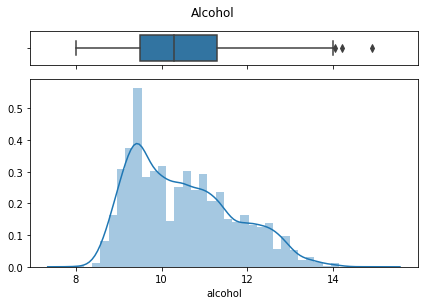

In [44]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["alcohol"], ax=ax_box)
sns.distplot(dataset["alcohol"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Alcohol", y = 1.05)

In [45]:
print("Valor de Assimetria: {}".format(skew(dataset['alcohol'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['alcohol'])))

Valor de Assimetria: 0.5657502795844987
Valor de Curtose: -0.5319948434959567


Os dados são quase simétricos e possuem uma distribuição com um pico um pouco mais alto do que a distribuição normal.

**Analise:**
    - Muitas features possuem grande quantidade de outliers;
    - No geral, os dados não possuem uma distribuição normal.

---

- **13. Analisando a coluna quality**

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

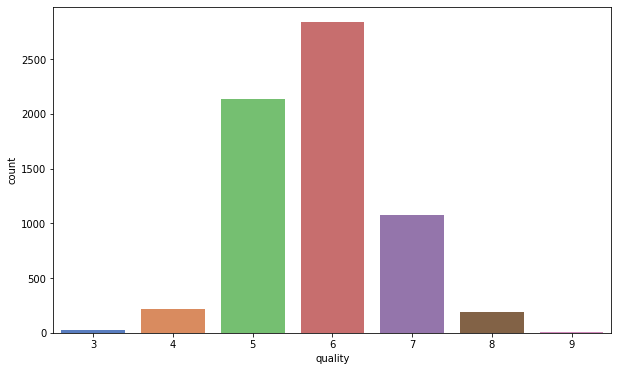

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset["quality"], palette="muted")
dataset["quality"].value_counts()

**Análise:**
- A maior parte dos dados estão concentrados com valores de qualidade entre 5 e 6;
- Após pesquisar no google sobre qualidade dos vinhos, vi que alguns especialistas parecem gosta de minha que não é muito azedo, nem muito doce, e também não muito seco, e sim suave e úmido. Dessa forma, acredito que as features  alcohol, pH, residual sugar, and total acidity iram contribuir com a target quality.

### 5. ANÁLISE EXPLORATÓRIA DA RELAÇÃO DE QUALIDADE COM DEMAIS FEATURES COM MAIOR CORRELAÇÃO

#### 5.1 Analisando correlação
- Primeiramente, correlação não implica causalidade,

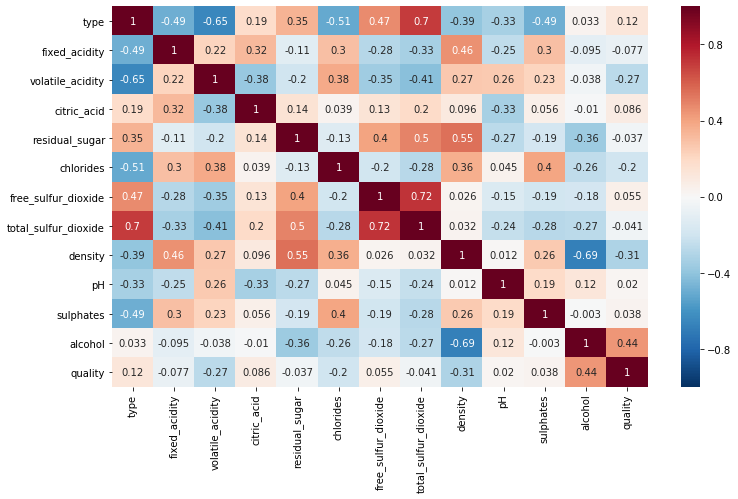

In [47]:
plt.figure(figsize=(12, 7))
heat_map = sns.heatmap(dataset.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

- As variáveis que apresentam maior correlação com a variável target (quality) são:
    - 1. Alcohol, 0.44;
    - 2. Density, -0.31;
    - 3. Volatile Acidity, -0.27;
    - 4. Chlorides, -0.2;
    - 5. Type, -0.12;
    - 6. Citric Acid, 0.086.

#### 5.1 Analisando as features mais importantes utilizando o algoritmo de Random Forest


No handles with labels found to put in legend.


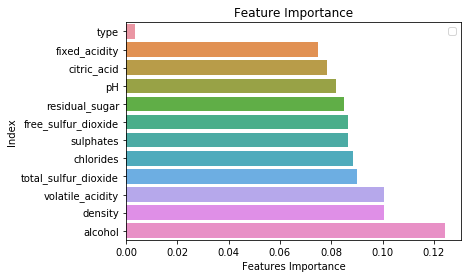

In [48]:
x = dataset.drop(columns='quality')
y = dataset['quality']
scaler = StandardScaler()
x = scaler.fit_transform(x)
random_forest_features = RandomForestClassifier(n_estimators=100)
random_forest_features.fit(x, y)

features_imp = pd.Series(random_forest_features.feature_importances_, index = dataset.columns[:-1])
features_imp_order = features_imp.sort_values()

# Criando barplot
sns.barplot(x=features_imp_order, y = features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance")
plt.legend()
plt.show()


In [49]:
features_imp_order

type                    0.003509
fixed_acidity           0.074840
citric_acid             0.078334
pH                      0.081809
residual_sugar          0.084800
free_sulfur_dioxide     0.086411
sulphates               0.086451
chlorides               0.088507
total_sulfur_dioxide    0.089985
volatile_acidity        0.100460
density                 0.100551
alcohol                 0.124343
dtype: float64

In [50]:
dataset.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 5.3 Analisando a variável target com algumas features


- **1. Gráfico {quality x pH}**

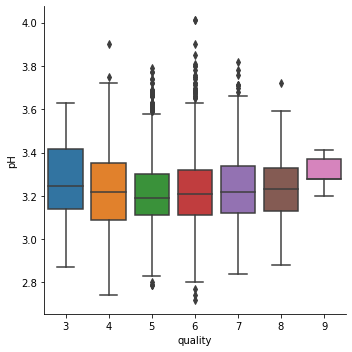

In [51]:
sns.catplot(x="quality", y="pH", kind="box", data=dataset);

- **2. Gráfico {quality x alcohol}**

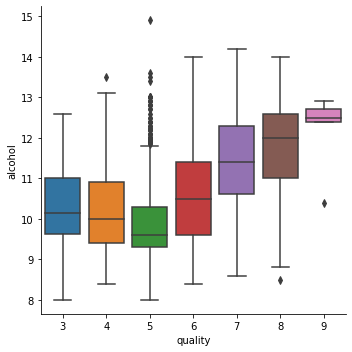

In [52]:
sns.catplot(x="quality", y="alcohol", kind="box", data=dataset);

    - Vinho com maior score de 'Qualidade' possuem maior 'Teor Alcoolico'.

- **3. Gráfico {quality x density}**

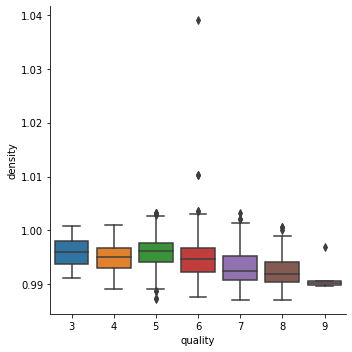

In [53]:
sns.catplot(x="quality", y="density", kind="box", data=dataset);

- **4. Gráfico {quality x volatile_acidity}**

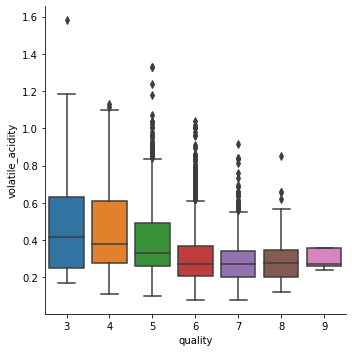

In [54]:
sns.catplot(x="quality", y="volatile_acidity", kind="box", data=dataset);

    - Vinho com baixo score de 'Qualidade' possuem maior quantidade de 'Volatilidade da acidez' 

- **5. Gráfico {quality x chlorides}**

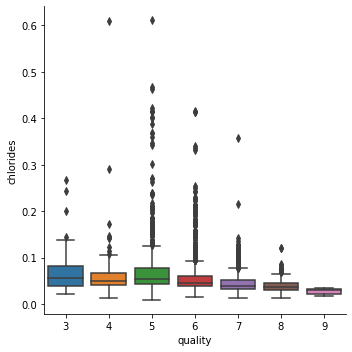

In [55]:
sns.catplot(x="quality", y="chlorides", kind="box", data=dataset);

- **6. Gráfico {quality x free_sulfur_dioxide}**

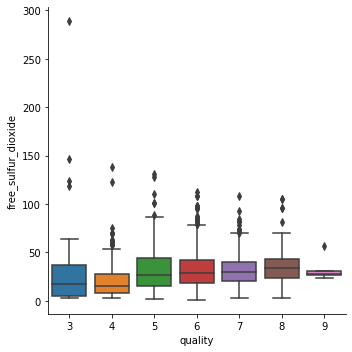

In [56]:
sns.catplot(x="quality", y="free_sulfur_dioxide", kind="box", data=dataset);

- **7. Gráfico {quality x citric_acid}**

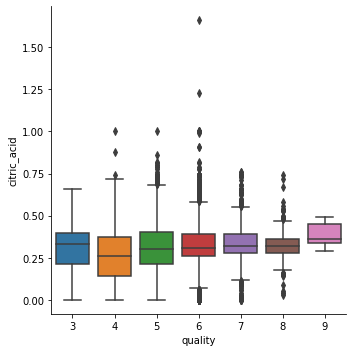

In [57]:
sns.catplot(x="quality", y="citric_acid", kind="box", data=dataset);

- **8. Gráfico {quality x fixed_acidity}**

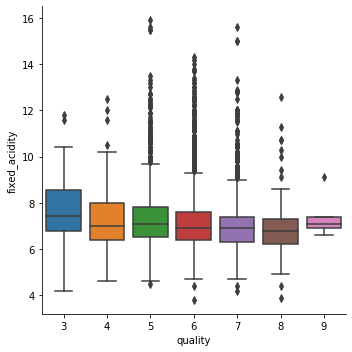

In [58]:
sns.catplot(x='quality', y='fixed_acidity', kind='box', data=dataset) 

- **9. Gráfico {quality x sulphates}**

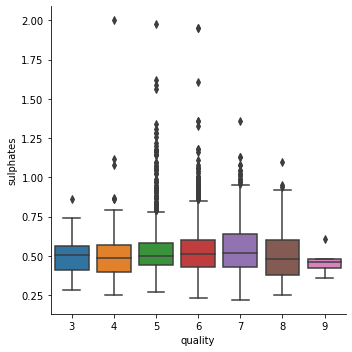

In [59]:
sns.catplot(x='quality', y='sulphates', kind='box', data=dataset) 

    - Vinho com maior score de 'Qualidade' possuem maior 'Sulfatos'.

**Análise:**
- Nota-se que as variáveis que apresentam maiores valores de correlação com a variável target, possuem relação mais intuitiva que as demais variáveis.
- Como o objetivo é prever o Score (0 a 10) da qualidade do vinho, talvez os dados apresentados não seram suficientes, sendo mais interessando subdividir a qualidade do vinho em duas (Bom e Ruim) ou três (Bom, Regular e Ruim) categorias. Tendo em vista que os dados não possuem grande variação de acordo com o score de qualidade do vinho.

### 6. MANIPULAÇÃO DOS DADOS

In [60]:
dataset.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
dataset.describe()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491547,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192534,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- Criando novas variáveis:


In [62]:
dataset_manipulado = dataset.copy()
dataset_manipulado['new_column'] = np.around(np.log(dataset['alcohol']/(dataset['density'] * dataset['volatile_acidity'])), decimals = 4)
dataset_manipulado['new_column_2'] = np.around(np.log(dataset['sulphates'] * dataset['free_sulfur_dioxide']/(dataset['chlorides'])), decimals = 4)
dataset_manipulado['result_sulfur'] = dataset['total_sulfur_dioxide'] - dataset['free_sulfur_dioxide']
dataset_manipulado['total_acidity'] = dataset['fixed_acidity'] + dataset['volatile_acidity']

In [63]:
dataset_manipulado.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,new_column,new_column_2,result_sulfur,total_acidity
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3.4831,6.1092,125.0,7.27
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3.4613,4.9416,118.0,6.60
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.5904,5.5759,67.0,8.38
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3.7666,5.7812,139.0,7.43
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3.7666,5.7812,139.0,7.43


In [64]:
dataset_manipulado = dataset_manipulado[['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
                                         'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                         'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
                                         'new_column', 'new_column_2','result_sulfur','total_acidity','quality']]

In [65]:
dataset_manipulado.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,new_column,new_column_2,result_sulfur,total_acidity,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3.4831,6.1092,125.0,7.27,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3.4613,4.9416,118.0,6.60,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3.5904,5.5759,67.0,8.38,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3.7666,5.7812,139.0,7.43,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3.7666,5.7812,139.0,7.43,6


In [66]:
dataset.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 6.1. Separando as features para 'x' e a target para 'y'

In [67]:
x_manipulado = dataset_manipulado.drop(columns=['quality'])
x_original = dataset.drop(columns=['quality'])

In [68]:
y_manipulado = dataset_manipulado['quality']
y_original = dataset['quality']

In [69]:
x_manipulado.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,new_column,new_column_2,result_sulfur,total_acidity
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3.4831,6.1092,125.0,7.27
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3.4613,4.9416,118.0,6.60
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3.5904,5.5759,67.0,8.38
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3.7666,5.7812,139.0,7.43
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3.7666,5.7812,139.0,7.43


In [70]:
x_original.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


#### 6.2. Separando dados de treino e teste

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x_manipulado, y_manipulado, test_size=0.20)

#### 6.3. Aplicando Técnica de Padronização dos Dados (transformando sua distribuição em uma distribuição normal)

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####  6.4. Visualizando as features mais importantes novamente
- Novas variáveis presentes

In [108]:
random_forest_features = RandomForestClassifier(n_estimators=100)
random_forest_features.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
features_imp = pd.Series(random_forest_features.feature_importances_, index = dataset_manipulado.columns[:-1])
features_imp_order = features_imp.sort_values()

No handles with labels found to put in legend.


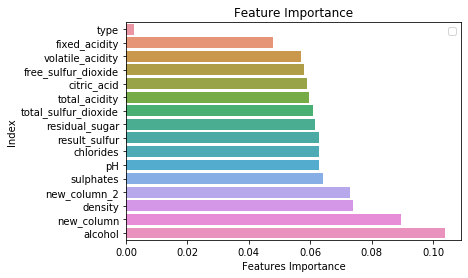

In [110]:
# Criando barplot
sns.barplot(x=features_imp_order, y = features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance")
plt.legend()
plt.show()


### 7. MACHINE LEARNING

#### 7.1. Logistic Regression

In [111]:
# parâmetros da LogisticRegression
grid_rl = {"C":[0.001,.009,0.01,.09,1,5,10,25],
           "penalty" : ["l1", "l2", "elasticnet"]}
# Criando modelo
logistic = LogisticRegression()
# Aplicando GridSearchCV
clf = GridSearchCV(logistic, param_grid = grid_rl, cv=5, scoring = 'accuracy', verbose=0)
# Treinando modelo
clf.fit(X_train, y_train)
# Fazendo predições
y_pred_logistic = clf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.09      0.15        47
           5       0.62      0.62      0.62       404
           6       0.55      0.72      0.63       590
           7       0.55      0.31      0.39       219
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.34      0.25      0.26      1300
weighted avg       0.56      0.58      0.55      1300



#### 7.2. GradientBoostingClassifier

In [112]:
# parâmetros da GradientBoostingClassifier
grid_gbc = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 1.0],
    "n_estimators":[10]
    }
# Criando modelo
GBC = GradientBoostingClassifier()
# Aplicando GridSearchCV
clf = GridSearchCV(GBC, param_grid = grid_gbc, cv=5, scoring = 'accuracy', verbose=0, n_jobs=-1)
# Treinando modelo
clf.fit(X_train, y_train)
# Fazendo predições
y_pred_gbc = clf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.09      0.15        47
           5       0.68      0.68      0.68       404
           6       0.62      0.78      0.69       590
           7       0.71      0.41      0.52       219
           8       0.59      0.50      0.54        32
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1300
   macro avg       0.44      0.35      0.37      1300
weighted avg       0.65      0.65      0.63      1300



#### 7.3 RandomForestClassifier

In [113]:
# parâmetros da Random Forest
grid_rf = {
    "n_estimators" : [100, 500, 1200],
    "max_depth": [5, 8, 15, 25],
    "max_features": ['auto', 'sqrt', 'log2']
    }

# Criando modelo
rf = RandomForestClassifier()
# Aplicando GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv = 5, scoring = 'accuracy', n_jobs = -1)
# Treinando modelo
clf_rf.fit(X_train, y_train)
# Fazendo predições
y_pred_rf = clf_rf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.09      0.16        47
           5       0.72      0.73      0.73       404
           6       0.68      0.80      0.74       590
           7       0.71      0.55      0.62       219
           8       0.86      0.56      0.68        32
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.57      0.39      0.42      1300
weighted avg       0.71      0.70      0.69      1300



#### 7.4. SVC

In [114]:
# parâmetros do SVC
grid_svc = {'C':[1,10,100],
            'gamma':[1,0.1,0.0001]}
# Criando modelo
svc = SVC()
# Aplicando GridSearchCV
clf_svc = GridSearchCV(svc, param_grid = grid_svc, cv = 5,  scoring = 'accuracy', n_jobs = -1)
# Treinando modelo
clf_svc.fit(X_train, y_train)
# Fazendo predições
y_pred_svc = clf_svc.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.09      0.15        47
           5       0.68      0.62      0.65       404
           6       0.62      0.78      0.69       590
           7       0.69      0.50      0.58       219
           8       0.69      0.62      0.66        32
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1300
   macro avg       0.48      0.37      0.39      1300
weighted avg       0.65      0.65      0.63      1300



#### 7.5. XGBClassifier

In [115]:
# parâmetros do XGBClassifier
grid_xgbc = { 'n_estimators': [150, 250, 500],
              'learning_rate': [0.01, 0.075, 0.15],
              'max_depth': [3, 5, 9]}
# Criando o modelo
xgb = XGBClassifier()
# Aplicando GridSearchCV
clf_xgb = GridSearchCV(xgb, param_grid= grid_xgbc, cv = 5,  scoring = 'accuracy', n_jobs = -1)
# Treinando modelo
clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.75      0.13      0.22        47
           5       0.69      0.71      0.70       404
           6       0.67      0.76      0.71       590
           7       0.68      0.54      0.60       219
           8       0.78      0.56      0.65        32
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.51      0.39      0.41      1300
weighted avg       0.68      0.68      0.67      1300



#### **Análise:**
    - O modelo que obteve as melhores métricas foi o modelo de Random Forest

- Realizando predições novamente, e validando modelo

In [116]:
# Fazendo predições
y_pred_rf = clf_rf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.09      0.16        47
           5       0.72      0.73      0.73       404
           6       0.68      0.80      0.74       590
           7       0.71      0.55      0.62       219
           8       0.86      0.56      0.68        32
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.57      0.39      0.42      1300
weighted avg       0.71      0.70      0.69      1300



### 8. Alterando objetivo do problema proposto
- Categorizando a variável target ***(qualidade)*** em três classes.
    - Ruim: qualidade 3 e 4;
    - Regular: qualidade 5 e 6;
    - Bom: qualidade 7, 8 e 9.

#### 8.1. formatando a variável targetm

In [117]:
quality = dataset_manipulado["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Ruim")
    elif num>6:
        category.append("Bom")
    else:
        category.append("Regular")


In [118]:
category = pd.DataFrame(data=category, columns=["category"])
dataset_manipulado_categoria = pd.concat([dataset,category],axis=1)
dataset_manipulado_categoria.drop(columns="quality",axis=1,inplace=True)

In [119]:
dataset_manipulado_categoria.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,category
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Regular
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Regular
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Regular
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular


Regular    4974
Bom        1277
Ruim        246
Name: category, dtype: int64

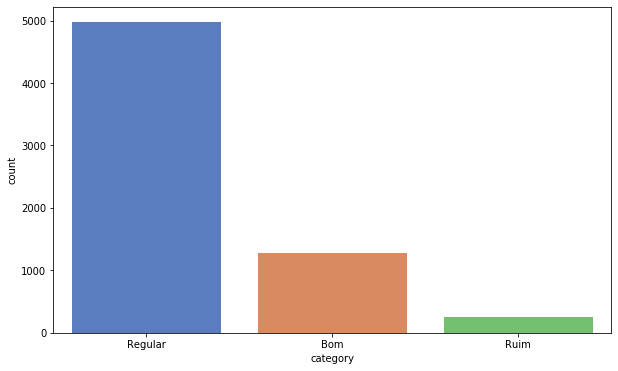

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(dataset_manipulado_categoria["category"],palette="muted")
dataset_manipulado_categoria["category"].value_counts()

#### 8.2. Separando as variáveis features e a variável target

In [121]:
x_cat = dataset_manipulado_categoria.drop(columns=['category'])
y_cat = dataset_manipulado_categoria['category']

#### 8.3. Padronizando os dados

In [122]:
sc_X = StandardScaler()
x_cat = sc_X.fit_transform(x_cat)

#### 8.4. Aplicando PCA

In [123]:
pca = PCA(n_components=8)
x_pca = pca.fit_transform(x_cat)

#### 8.5 Separando os dados em treino e teste

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_cat, test_size = 0.2,random_state=0)

#### 8.6 Utilizando os parâmetros otimizados com o metodo GridSearchCV para o algoritmo de RandomForest

In [125]:
clf_rf.best_params_

{'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 500}

In [126]:
rf_cat = RandomForestClassifier()

rf_cat.fit(X_train, y_train)

y_pred_rf = rf_cat.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         Bom       0.80      0.56      0.66       252
     Regular       0.86      0.97      0.91       995
        Ruim       0.83      0.09      0.17        53

    accuracy                           0.85      1300
   macro avg       0.83      0.54      0.58      1300
weighted avg       0.85      0.85      0.83      1300



# FIM